# Data sets

There is a lot of Documentation on this subject. Here we will breifly introduce Series and Dataframes to help research with DataBases

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [8]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
print s

a   -0.103859
b   -0.155169
c   -1.789908
d   -0.016353
e   -0.592380
dtype: float64


In [9]:
s['a']

-0.10385902850282017

In [10]:
s[0]

-0.10385902850282017

In [11]:
s['c']*3.0

-5.3697251291070458

In [12]:
np.exp(s)

a    0.901352
b    0.856271
c    0.166975
d    0.983780
e    0.553009
dtype: float64

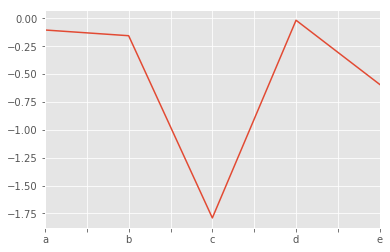

In [13]:
s.plot()

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.ipp.mpg.de/36468/zoom-1369313316.jpg")

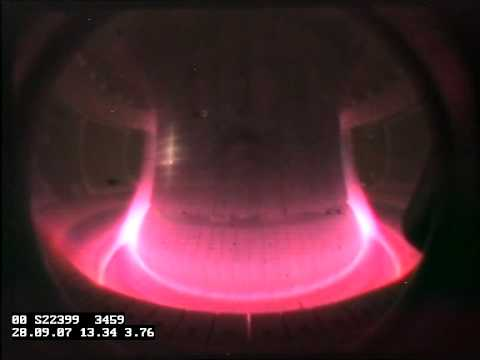

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("QCK51vqWunU")

In [13]:
shot = pd.Series(np.array([1e6, 12e6, 0.0, 1.2e6]), index=['PECRH', 'PNBI', 'PICRH', 'POHM'], name='#30554')
print shot

PECRH     1000000.0
PNBI     12000000.0
PICRH           0.0
POHM      1200000.0
Name: #30554, dtype: float64


In [ ]:
np.sum(shot)

In [14]:
shot2 = pd.Series(np.array([2.5e6, 6e6, 3e6, 1.0e6]), index=['PECRH', 'PNBI', 'PICRH', 'POHM'], name="#30733")
print shot2

PECRH    2500000.0
PNBI     6000000.0
PICRH    3000000.0
POHM     1000000.0
Name: #30733, dtype: float64


In [ ]:
np.sum(shot2)

In [ ]:
shot + shot2

In [ ]:
shot['PECRH'] + shot2['PECRH']

In [ ]:
print "Total heating power:", np.sum(shot + shot2)
print "Total heating power:", np.sum(shot) + np.sum(shot2)

In [ ]:
shot.mean()

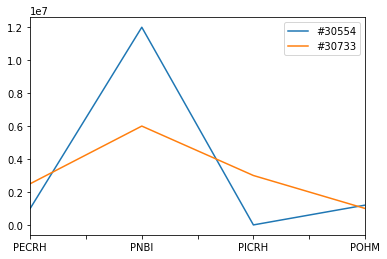

In [20]:
shot.plot()
shot2.plot()
plt.legend()
plt.show()

# Dataframes

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

In [28]:
import webbrowser
url = 'https://en.wikipedia.org/wiki/2016%E2%80%9317_Primeira_Liga#Attendances'
webbrowser.open(url)

True

In [18]:
df = pd.read_csv('Files/Attendances.csv')
##Get a single sheet
#df = pd.ExcelFile('Files/Attendances.xlsx').parse('Attendances')
#Or read_json (not in this class)
#Or read from clipboard (additional packaged needed)
#df = pd.read_clipboard()

In [23]:
df.head(3)

,Pos,Team,Total,High,Low,Average,Change
0,1,Benfica,390748,63312,51566,55821,+10.9%
1,2,Sporting CP,388328,49399,40027,43148,+7.9%
2,3,Porto,277491,50019,22208,34686,+7.3%


In [19]:
df.tail(2)

,Pos,Team,Total,High,Low,Average,Change
16,17,Arouca,"14,247","5,351",740,"1,781",−38.2%
17,18,Moreirense,"11,394","3,810",640,"1,424",−36.5%


In [ ]:
df

In [20]:
df.loc[4]

Pos             5
Team        Braga
Total      73,298
High       11,328
Low         7,543
Average     9,162
Change     −17.9%
Name: 4, dtype: object

In [22]:
df = pd.read_csv('Files/Attendances.csv', index_col='Pos')

In [24]:
df.head(3)

,Team,Total,High,Low,Average,Change
Pos,,,,,,
1,Benfica,"390,748","63,312","51,566","55,821",+10.9%
2,Sporting CP,"388,328","49,399","40,027","43,148",+7.9%
3,Porto,"277,491","50,019","22,208","34,686",+7.3%


In [26]:
df.loc[1]

Team       Benfica
Total      390,748
High        63,312
Low         51,566
Average     55,821
Change      +10.9%
Name: 1, dtype: object

In [27]:
df[['Team','Average']]

,Team,Average
Pos,,
1,Benfica,"55,821"
2,Sporting CP,"43,148"
3,Porto,"34,686"
4,Vitória de Guimarães,"17,581"
5,Braga,"9,162"
6,Marítimo,"6,535"
7,Boavista,"5,259"
8,Belenenses,"4,997"
9,Rio Ave,"4,327"


In [29]:
#How many people during a Match Day went to a game
df['Average'].sum()

'55,82143,14834,68617,5819,1626,5355,2594,9974,3273,3573,2053,0582,6102,5522,2212,1231,7811,424'

You need to be careful and make sure your database is conviniently formatted. Here, the Portuguese convention for the thousands separator, a comma, ruined our chances of having floats or ints. No math is possible, so we must replace it in the database.

In [34]:
#Fields we want to change
df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

,Total,High,Low,Average
Pos,,,,
1,390748,63312,51566,55821
2,388328,49399,40027,43148
3,277491,50019,22208,34686
4,140646,26985,12953,17581
5,73298,11328,7543,9162
6,45746,10320,4150,6535
7,42070,9958,4182,5259
8,34982,12236,1309,4997
9,38945,8357,2116,4327


In [ ]:
#df2

In [ ]:
#df2.mean()

In [37]:
#To replace with a similar dataframe as the original
ndf = df.copy(deep=True)
ndf[['Total','High','Low','Average']] = df[['Total','High','Low','Average']].replace(to_replace=',', value='', regex=True).astype(int)

In [38]:
ndf.head()

,Team,Total,High,Low,Average,Change
Pos,,,,,,
1,Benfica,390748,63312,51566,55821,+10.9%
2,Sporting CP,388328,49399,40027,43148,+7.9%
3,Porto,277491,50019,22208,34686,+7.3%
4,Vitória de Guimarães,140646,26985,12953,17581,+41.5%
5,Braga,73298,11328,7543,9162,−17.9%


In [39]:
df.head()

,Team,Total,High,Low,Average,Change
Pos,,,,,,
1,Benfica,"390,748","63,312","51,566","55,821",+10.9%
2,Sporting CP,"388,328","49,399","40,027","43,148",+7.9%
3,Porto,"277,491","50,019","22,208","34,686",+7.3%
4,Vitória de Guimarães,"140,646","26,985","12,953","17,581",+41.5%
5,Braga,"73,298","11,328","7,543","9,162",−17.9%


In [40]:
ndf[ndf['Total']>100000]

,Team,Total,High,Low,Average,Change
Pos,,,,,,
1,Benfica,390748,63312,51566,55821,+10.9%
2,Sporting CP,388328,49399,40027,43148,+7.9%
3,Porto,277491,50019,22208,34686,+7.3%
4,Vitória de Guimarães,140646,26985,12953,17581,+41.5%


In [41]:
ndf.sort_values('High', ascending=False)

,Team,Total,High,Low,Average,Change
Pos,,,,,,
1,Benfica,390748,63312,51566,55821,+10.9%
3,Porto,277491,50019,22208,34686,+7.3%
2,Sporting CP,388328,49399,40027,43148,+7.9%
4,Vitória de Guimarães,140646,26985,12953,17581,+41.5%
8,Belenenses,34982,12236,1309,4997,+12.0%
5,Braga,73298,11328,7543,9162,−17.9%
6,Marítimo,45746,10320,4150,6535,+6.3%
7,Boavista,42070,9958,4182,5259,−13.4%
9,Rio Ave,38945,8357,2116,4327,+31.0%


print the line where condition is met

In [42]:
ndf.loc[ndf['Low'].idxmin()]

Team       Moreirense
Total           11394
High             3810
Low               640
Average          1424
Change         −36.5%
Name: 18, dtype: object

In [43]:
ndf.loc[ndf['Low'].idxmax()]

Team       Benfica
Total       390748
High         63312
Low          51566
Average      55821
Change      +10.9%
Name: 1, dtype: object

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
#Make it nicer
matplotlib.style.use('ggplot')

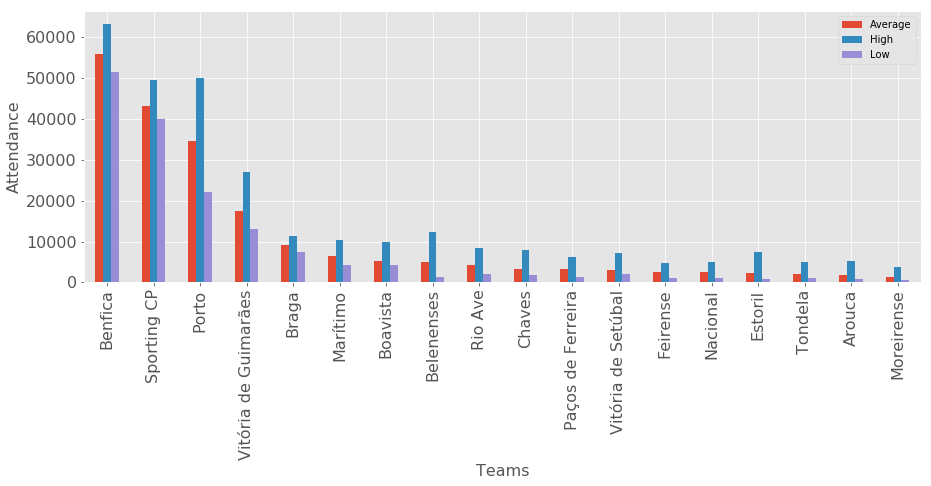

In [91]:
#ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar')
fnt_size=16
ax = ndf[['Average','High','Low']].plot(x=ndf['Team'], kind='bar', figsize=(15,5), fontsize=fnt_size)
ax.set_xlabel('Teams', fontsize=fnt_size)
ax.set_ylabel('Attendance', fontsize=fnt_size)
plt.show()

### Extra: Seaborn as a visualization platform for pandas

In [89]:
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

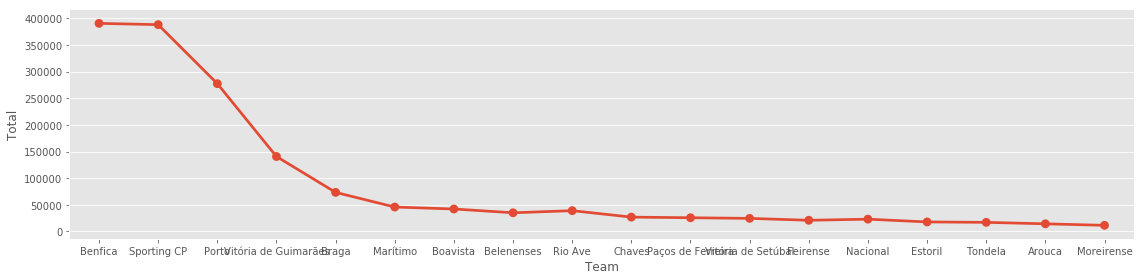

In [90]:
sns.factorplot(x='Team', y='Total', data=ndf, aspect=4, )